In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn

In [ ]:
import matplotlib.font_manager as fm
fe = fm.FontEntry(
  fname=r'font/NanumGothic.ttf',
  name='NanumGothic'
)
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.family':'NanumGothic', 'font.size':14})
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
iris = seaborn.load_dataset('iris') # 붓꽃 데이터
titanic = seaborn.load_dataset('titanic') # 타이타닉 데이터
tips = seaborn.load_dataset('tips') # 팁 데이터
flights = seaborn.load_dataset('flights') # 여객기 데이터

#### seaborn을 활용한 1차원 분포 플롯  
seaborn 패키지에서 제공해주는 여러 가지 메서드를 활용하여 간단하게 1차원 분포 플롯을 표시할 수 있음  

##### 1차원 실수 분포 플롯 
seaborn 패키지는 히스토그램 형식과는 다른 커널 밀도(kernel density), 러그 플롯을 제공함  
`rugplot()` : 데이터 위치를 x출 위에 작은 선분으로 표시 (러그 플롯)  
`kdeplot()` : 히스토그램과 비슷하지만 곡선형태로 표시 (커널 플롯)

In [ ]:
data = iris.petal_length.values
data

In [ ]:
seaborn.rugplot(data)
plt.title('러그 플롯')
plt.grid(True)
plt.show()

In [ ]:
seaborn.kdeplot(data)
plt.title('커널 밀도 플롯')
plt.grid(True)
plt.show()

##### 카운트 플롯  
seaborn 패키지의 `countplot()` 메서드로 각 카테고리 별 사이즈를 표시할 수 있음  
`countplot()` 메서드는 데이터프레임만 사용 가능  
`countplot(x = '컬럼명', data=dataframe)`

In [ ]:
seaborn.countplot(x='embark_town', data=titanic)
plt.title('타이타닉 카운트 플롯')
plt.show()

In [ ]:
seaborn.countplot(x='day', data=tips)
plt.title('요일별 팁')
plt.grid(True)
plt.show()

#### seaborn을 활용한 다차원 데이터  
다차원 데이터는 3가지 경우의 수를 가질 수 있음  

- 모든 데이터가 실수형  
- 모든 데이터가 카테고리형  
- 데이터가 실수형과 카테고리형이 섞여 있음  

##### 2차원 실수형 데이터  
데이터가 2차원이면서 모두 실수이면 `jointplot()` 메서드를 사용하여 표현 할 수 있음  
`jointplot()` : 스캐터 플롯, 등고선 플롯 등을 나타낼 수 있고 양측에 히스토그램을 표현해 줌 (데이터프레임만 사용 가능)  

In [ ]:
iris

In [ ]:
seaborn.jointplot(data= iris, x='sepal_length', y='sepal_width', kind='scatter')
plt.suptitle('꽃받침의 길이와 넓이 비교 Joint plot', y=1.02) # 겹쳐지는거 방지위해 y 값 추가
plt.grid(True)
plt.show()

In [ ]:
seaborn.jointplot(data= iris, x='sepal_length', y='sepal_width', kind='reg')
plt.suptitle('꽃받침의 길이와 넓이 비교 Joint plot', y=1.02) # 겹쳐지는거 방지위해 y 값 추가
plt.grid(True)
plt.show()

##### 다차원 실수형 데이터  
3차원 이상의 데이터라면 `pairplot()` 메서드로 그리드 형태의 스캐터 플롯의 행렬을 만달어 줌  
같은 데이터가 만나는 대각선에는 각 데이터의 히스토그램을 표현

In [ ]:
seaborn.pairplot(iris)
plt.suptitle('다차원 Pair plot', y=1.02)
plt.show()

카테고리형 데이터가 포함되어 있는 경우라면 `hue` 인수에 카테고리 변수 이름을 지정함

In [ ]:
seaborn.pairplot(iris, hue='species', markers=['o', 's', 'D'])
plt.suptitle('다차원 Pair plot', y=1.02)
plt.show()

##### 2차원 카테고리 데이터 
데이터가 2차원이면서 모두 카테고리 값이면 `heatmap()` 메서드로 히트맵을 표현할 수 있음  

In [ ]:
titanic_size = titanic.pivot_table(index = 'class', columns='sex', aggfunc='size')
titanic_size

In [ ]:
seaborn.heatmap(titanic_size, cmap=seaborn.light_palette('grey', as_cmap=True), annot=True, fmt='d')
plt.title('히트맵')
plt.show()
# annot : 차트 내부 값표시
# as_cmap : 우측 막대 경계선 구분

##### 2차원 복합 데이터
데이터가 2차원이면서 실수값과 카테고리 값이 섞여 있다면 기존 플롯 외의 다른 플롯을 사용할 수 있음  

`barplot()` : 카테고리 값에 따른 실수 값의 평균과 표준 편차를 바 형태로 표시  
평균은 막대 그래프, 편차는 에러바로 표현  

In [ ]:
seaborn.barplot(data=tips, x='day', y='total_bill')
plt.title('바 플롯')
plt.grid(True)
plt.show()

`boxplot()` : 사분위수와 아웃라이어라는 데이터를 표현하는 방법  

In [ ]:
seaborn.boxplot(data=tips, x='day', y='total_bill')
plt.title('박스 플롯')
plt.grid(True)
plt.show()

`violinplot()` : 세로 방향으로 커널 밀도 히스토그램을 그려줌  

In [ ]:
seaborn.violinplot(data=tips, x='day', y='total_bill')
plt.title('바이올린 플롯')
plt.grid(True)
plt.show()

`stripplot()` : 모든 데이터를 점으로 표시해서 보여줌  

In [ ]:
seaborn.stripplot(data=tips, x='day', y='total_bill')
plt.title('스트립 플롯')
plt.grid(True)
plt.show()

`swarmplot()` : 스트립 플롯에서 데이터가 겹치는 부분을 겹치지 않게 표현

In [ ]:
seaborn.swarmplot(data=tips, x='day', y='total_bill')
plt.title('스웜 플롯')
plt.grid(True)
plt.show()

#### seaborn을 활용한 다차원 복합 데이터  
seaborn에서 제공해주는 플롯 메서드들은 `hue` 인수로 카테고리 값을 추가로 지정할 수 있음  

In [ ]:
seaborn.barplot(data=tips, x='day', y='total_bill', hue='sex')
plt.title('바 플롯')
plt.grid(True)
plt.show()

In [ ]:
seaborn.violinplot(data=tips, x='day', y='total_bill', hue='sex')
plt.title('바이올린 플롯')
plt.grid(True)
plt.show()

`stripplot()`, `swarmplot()`, `violinplot()` 은 `split`, `dodge` 인수로 시각화 방법을 변경할 수 있음  

In [ ]:
seaborn.violinplot(data=tips, x='day', y='total_bill', hue='sex', split=True)
plt.title('바이올린 플롯')
plt.grid(True)
plt.show()

In [ ]:
seaborn.swarmplot(data=tips, x='day', y='total_bill', hue='sex', dodge=True)
plt.title('스웜 플롯')
plt.grid(True)
plt.show()

`heatmap()` 으로 두개의 카테고리 값에 의한 실수 값 변화를 볼 수 있음  

In [ ]:
passengers = flights.pivot(index='month', columns='year', values='passengers')
seaborn.heatmap(passengers, annot=True, fmt='d', linewidths=1)
plt.title('히트맵으로 두개의 카테고리 값 변화 비교')
plt.show()

#### seaborn을 활용한 `catplot()`
색상과 행을 사용해서 3개 이상의 카테고리 값의 분포를 표현 

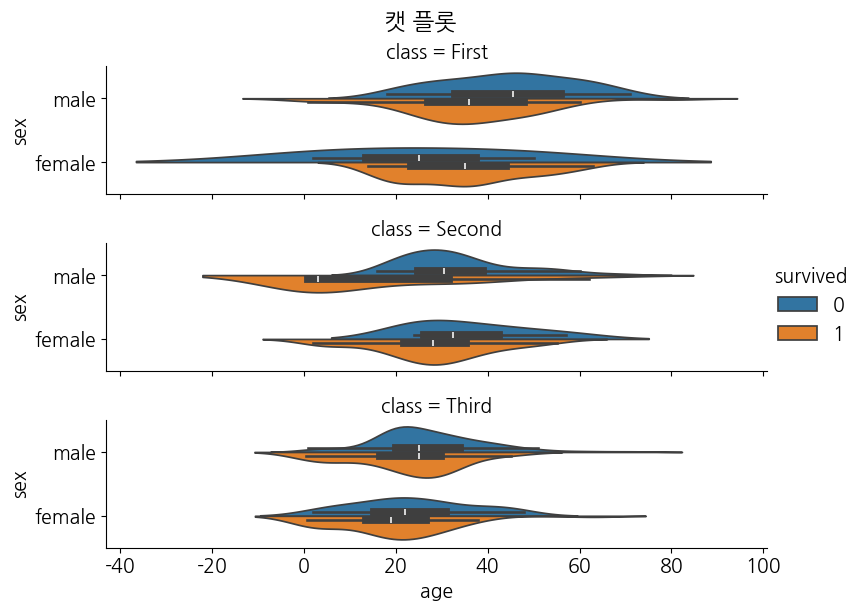

In [97]:
data = titanic[titanic.survived.notnull()]

seaborn.catplot(data=data, x='age', y='sex', hue='survived', row='class', kind='violin', split=True, height=2, aspect=4)
plt.suptitle('캣 플롯', y=1.02)
plt.show()